# Analyse des données de vente

##### Importer les données et les librairies

In [190]:
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
df = pd.read_excel('./data/All_months_data.xlsx', sheet_name='Sales_Data (2)')
df.sample(10)

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2
87699,232887.0,Wired Headphones,1.0,07/31/19 14:06,"334 Highland St, Atlanta, GA 30301",07,31,juil,11.99,11.99
125463,198814.0,Lightning Charging Cable,1.0,05/22/19 15:37,"458 Ridge St, San Francisco, CA 94016",05,22,mai,14.95,14.95
78753,224340.0,Lightning Charging Cable,1.0,07/11/19 18:16,"82 Sunset St, Seattle, WA 98101",07,11,juil,14.95,14.95
64005,158605.0,AAA Batteries (4-pack),3.0,02/19/19 13:00,"650 5th St, New York City, NY 10001",02,19,févr,8.97,2.99
70894,144416.0,LG Dryer,1.0,01/21/19 22:53,"68 Lincoln St, New York City, NY 10001",01,21,janv,600.00,600.00
12955,188906.0,LG Dryer,1.0,04/27/19 15:47,"230 8th St, Los Angeles, CA 90001",04,27,avr,600.00,600.00
87706,232894.0,Bose SoundSport Headphones,1.0,07/21/19 15:54,"243 Maple St, Los Angeles, CA 90001",07,21,juil,99.99,99.99
76302,149577.0,AAA Batteries (4-pack),3.0,01/09/19 15:43,"387 Forest St, San Francisco, CA 94016",01,09,janv,8.97,2.99
131907,204947.0,USB-C Charging Cable,1.0,05/30/19 19:57,"432 Willow St, Boston, MA 02215",05,30,mai,11.95,11.95
135952,208814.0,Lightning Charging Cable,1.0,05/08/19 19:47,"92 Church St, Los Angeles, CA 90001",05,08,mai,14.95,14.95


### Pré-traitement avec Python

In [192]:
df["City"] = df["Purchase Address"].str.split(",").str[1]
df["State"] = df["Purchase Address"].str.split(",").str[2].str.split(" ").str[1]
df["City (State)"] = df["City"] + " (" + df["State"] + ")"
df.sample(10)

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2,City,State,City (State)
64176,158773.0,20in Monitor,1.0,02/11/19 19:05,"578 Forest St, New York City, NY 10001",02,11,févr,109.99,109.99,New York City,NY,New York City (NY)
18855,237128.0,USB-C Charging Cable,1.0,08/09/19 22:38,"634 Adams St, Seattle, WA 98101",08,09,août,11.95,11.95,Seattle,WA,Seattle (WA)
142933,284352.0,iPhone,1.0,11/05/19 14:45,"153 Maple St, San Francisco, CA 94016",11,05,nov,700.00,700.00,San Francisco,CA,San Francisco (CA)
141576,283055.0,Vareebadd Phone,1.0,11/05/19 00:54,"353 Washington St, Portland, OR 97035",11,05,nov,400.00,400.00,Portland,OR,Portland (OR)
97242,215234.0,Bose SoundSport Headphones,1.0,06/08/19 16:18,"605 11th St, San Francisco, CA 94016",06,08,juin,99.99,99.99,San Francisco,CA,San Francisco (CA)
38262,303167.0,34in Ultrawide Monitor,1.0,12/27/19 09:38,"922 Chestnut St, Seattle, WA 98101",12,27,déc,379.99,379.99,Seattle,WA,Seattle (WA)
133789,206741.0,27in FHD Monitor,1.0,05/31/19 19:15,"7 Hill St, Atlanta, GA 30301",05,31,mai,149.99,149.99,Atlanta,GA,Atlanta (GA)
181638,254357.0,USB-C Charging Cable,1.0,09/13/19 13:25,"303 Park St, San Francisco, CA 94016",09,13,sept,11.95,11.95,San Francisco,CA,San Francisco (CA)
114835,171150.0,iPhone,1.0,03/03/19 10:45,"931 13th St, Los Angeles, CA 90001",03,03,mars,700.00,700.00,Los Angeles,CA,Los Angeles (CA)
33889,298995.0,AA Batteries (4-pack),1.0,12/31/19 11:55,"909 Johnson St, Los Angeles, CA 90001",12,31,déc,3.84,3.84,Los Angeles,CA,Los Angeles (CA)


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Order ID               185950 non-null  float64
 1   Product                186305 non-null  object 
 2   Quantity Ordered       185950 non-null  float64
 3   Order Date             186305 non-null  object 
 4   Purchase Address       186305 non-null  object 
 5   N° Mois                186305 non-null  object 
 6   N° Jour de la semaine  186305 non-null  object 
 7   Mois                   185950 non-null  object 
 8   Vente                  185950 non-null  float64
 9   Price2                 185950 non-null  float64
 10  City                   185950 non-null  object 
 11  State                  185950 non-null  object 
 12  City (State)           185950 non-null  object 
dtypes: float64(4), object(9)
memory usage: 18.5+ MB


In [194]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2,City,State,City (State)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186563,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN
186632,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN
186738,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df = df.dropna(how='all')
df= df.drop_duplicates()
df.sample(10)

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2,City,State,City (State)
174023,277700.0,USB-C Charging Cable,1.0,10/15/19 18:57,"462 Main St, New York City, NY 10001",10,15,oct,11.95,11.95,New York City,NY,New York City (NY)
53651,317881.0,AA Batteries (4-pack),2.0,12/01/19 17:01,"417 Sunset St, San Francisco, CA 94016",12,01,déc,7.68,3.84,San Francisco,CA,San Francisco (CA)
99681,217589.0,Apple Airpods Headphones,1.0,06/03/19 10:19,"853 Johnson St, San Francisco, CA 94016",06,03,juin,150.00,150.00,San Francisco,CA,San Francisco (CA)
40812,305601.0,Apple Airpods Headphones,1.0,12/03/19 11:18,"814 10th St, Austin, TX 73301",12,03,déc,150.00,150.00,Austin,TX,Austin (TX)
176839,249757.0,Bose SoundSport Headphones,1.0,09/16/19 01:32,"48 Ridge St, Los Angeles, CA 90001",09,16,sept,99.99,99.99,Los Angeles,CA,Los Angeles (CA)
124104,197526.0,Wired Headphones,1.0,05/07/19 06:08,"221 Johnson St, New York City, NY 10001",05,07,mai,11.99,11.99,New York City,NY,New York City (NY)
44653,309271.0,AA Batteries (4-pack),1.0,12/16/19 17:38,"520 4th St, Atlanta, GA 30301",12,16,déc,3.84,3.84,Atlanta,GA,Atlanta (GA)
5383,181704.0,AA Batteries (4-pack),2.0,04/29/19 12:29,"367 Adams St, New York City, NY 10001",04,29,avr,7.68,3.84,New York City,NY,New York City (NY)
36204,301197.0,ThinkPad Laptop,1.0,12/12/19 16:49,"621 Lincoln St, San Francisco, CA 94016",12,12,déc,999.99,999.99,San Francisco,CA,San Francisco (CA)
154090,294999.0,Lightning Charging Cable,1.0,11/18/19 08:20,"764 Chestnut St, Los Angeles, CA 90001",11,18,nov,14.95,14.95,Los Angeles,CA,Los Angeles (CA)


In [196]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2,City,State,City (State)
519,NaN,Product,NaN,Order Date,Purchase Address,Or,er,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Order ID               185686 non-null  float64
 1   Product                185687 non-null  object 
 2   Quantity Ordered       185686 non-null  float64
 3   Order Date             185687 non-null  object 
 4   Purchase Address       185687 non-null  object 
 5   N° Mois                185687 non-null  object 
 6   N° Jour de la semaine  185687 non-null  object 
 7   Mois                   185686 non-null  object 
 8   Vente                  185686 non-null  float64
 9   Price2                 185686 non-null  float64
 10  City                   185686 non-null  object 
 11  State                  185686 non-null  object 
 12  City (State)           185686 non-null  object 
dtypes: float64(4), object(9)
memory usage: 19.8+ MB


## Data Exploration

#### Le meilleur mois pour les ventes

In [198]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,N° Mois,N° Jour de la semaine,Mois,Vente,Price2,City,State,City (State)
43577,308245.0,USB-C Charging Cable,1.0,12/07/19 19:33,"844 Main St, Los Angeles, CA 90001",12,07,déc,11.95,11.95,Los Angeles,CA,Los Angeles (CA)
21395,239560.0,USB-C Charging Cable,1.0,08/14/19 15:31,"131 Lakeview St, Boston, MA 02215",08,14,août,11.95,11.95,Boston,MA,Boston (MA)
179957,252749.0,Apple Airpods Headphones,1.0,09/22/19 11:00,"894 4th St, Los Angeles, CA 90001",09,22,sept,150.00,150.00,Los Angeles,CA,Los Angeles (CA)
72933,146356.0,AAA Batteries (4-pack),1.0,01/02/19 15:22,"780 12th St, Los Angeles, CA 90001",01,02,janv,2.99,2.99,Los Angeles,CA,Los Angeles (CA)
180479,253253.0,AA Batteries (4-pack),1.0,09/30/19 10:20,"785 Willow St, San Francisco, CA 94016",09,30,sept,3.84,3.84,San Francisco,CA,San Francisco (CA)
28041,245907.0,Flatscreen TV,1.0,08/05/19 15:44,"628 7th St, Atlanta, GA 30301",08,05,août,300.00,300.00,Atlanta,GA,Atlanta (GA)
7696,183901.0,USB-C Charging Cable,1.0,04/09/19 21:58,"95 14th St, Los Angeles, CA 90001",04,09,avr,11.95,11.95,Los Angeles,CA,Los Angeles (CA)
122521,196014.0,iPhone,1.0,05/16/19 11:49,"872 Wilson St, Atlanta, GA 30301",05,16,mai,700.00,700.00,Atlanta,GA,Atlanta (GA)
80132,225657.0,USB-C Charging Cable,2.0,07/24/19 13:38,"50 7th St, Portland, OR 97035",07,24,juil,23.90,11.95,Portland,OR,Portland (OR)
82718,228114.0,USB-C Charging Cable,1.0,07/07/19 14:20,"736 Hickory St, San Francisco, CA 94016",07,07,juil,11.95,11.95,San Francisco,CA,San Francisco (CA)


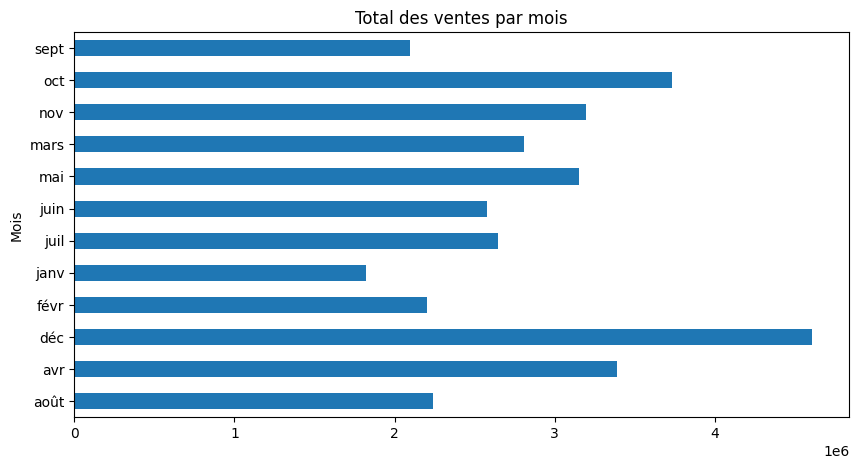

In [199]:
Months_sales = df.groupby('Mois')['Vente'].sum()
Months_sales.plot(kind='barh', figsize=(10, 5), title='Total des ventes par mois')
plt.show()

In [200]:
top_month_sales = Months_sales.sort_values(ascending=False).head(2)
top_month_sales

Mois
déc    4608295.70
oct    3734777.86
Name: Vente, dtype: float64

#### La ville avec le plus de vente

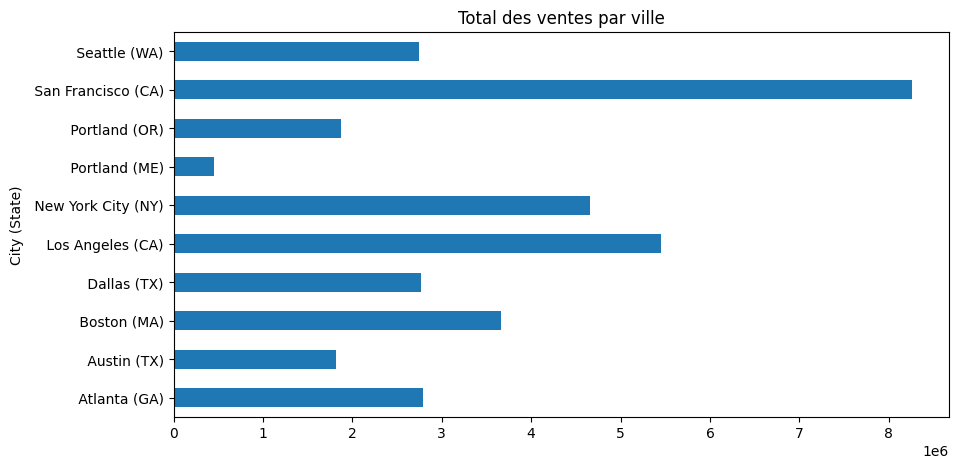

In [201]:
City_sales = df.groupby('City (State)')['Vente'].sum()
City_sales.plot(kind='barh', figsize=(10, 5), title='Total des ventes par ville')
plt.show()

In [202]:
top_City_sales = City_sales.sort_values(ascending=False).head(2)
top_City_sales

City (State)
San Francisco (CA)    8254743.55
Los Angeles (CA)      5448304.28
Name: Vente, dtype: float64

#### Meilleurs jours du mois pour faire de la publicité


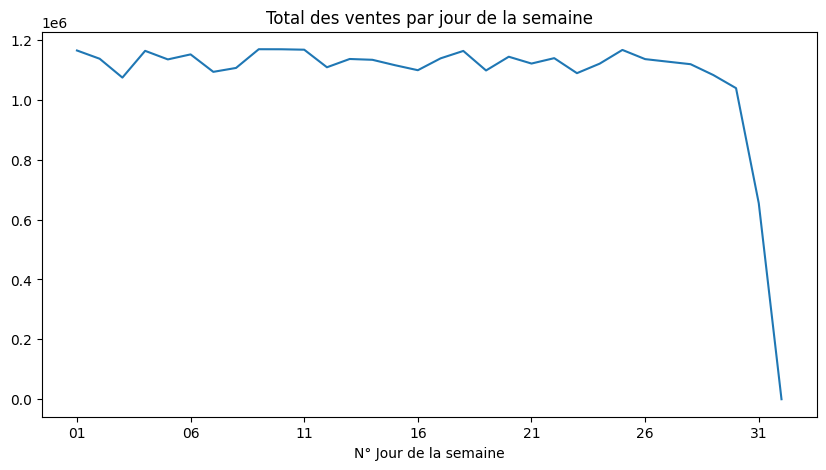

In [203]:
days_sales = df.groupby('N° Jour de la semaine')['Vente'].sum()
days_sales.plot(kind='line', figsize=(10, 5), title='Total des ventes par jour de la semaine')
plt.show()

#### Le produit le plus vendu

In [204]:
Product_sales = df.groupby('Product')['Vente'].count()
Product_sales

Product
20in Monitor                   4098
27in 4K Gaming Monitor         6225
27in FHD Monitor               7498
34in Ultrawide Monitor         6174
AA Batteries (4-pack)         20558
AAA Batteries (4-pack)        20612
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
Flatscreen TV                  4794
Google Phone                   5522
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      21610
Macbook Pro Laptop             4721
Product                           0
ThinkPad Laptop                4126
USB-C Charging Cable          21859
Vareebadd Phone                2065
Wired Headphones              18849
iPhone                         6840
Name: Vente, dtype: int64

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_23932\2073908025.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(Product_sales.index, rotation=90)


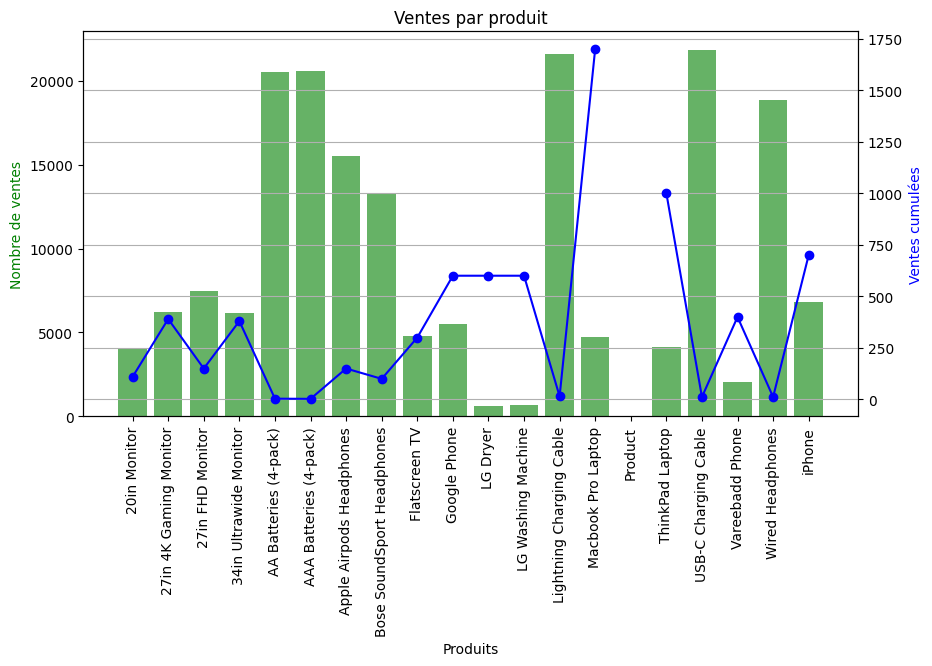

In [205]:
prix_article = df.groupby('Product')['Price2'].mean()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

ax1.bar(Product_sales.index, Product_sales.values, color='g', alpha=0.6, label='Nombre de ventes')
ax2.plot(Product_sales.index, prix_article, color='b', marker='o', label='Prix moyen par article')
ax1.set_xticklabels(Product_sales.index, rotation=90)
ax1.set_xlabel('Produits')
ax1.set_ylabel('Nombre de ventes', color='g')
ax2.set_ylabel('Ventes cumulées', color ='b')
ax1.set_title('Ventes par produit')
plt.grid()
plt.show()

### Problème : Le Panier 

> Trouver les articles qui sont achetés ensemble

In [206]:
from itertools import combinations
from collections import Counter

In [208]:
df['Order ID'] = df['Order ID'].astype(str)
 
grouped_orders = df.groupby('Order ID')['Product'].apply(lambda x : ', '.join(x)).reset_index() 
grouped_orders = grouped_orders[grouped_orders['Product'].str.contains(',')]

In [ ]:
count = Counter()
for product in grouped_orders['Product']:
    products = product.split(', ')
    count.update(Counter(combinations(products, 2)))

for key, value in count.most_common(10):
    print(f"{key}: {value}")    

('iPhone', 'Lightning Charging Cable'): 1002
('Google Phone', 'USB-C Charging Cable'): 985
('iPhone', 'Wired Headphones'): 447
('Google Phone', 'Wired Headphones'): 413
('Vareebadd Phone', 'USB-C Charging Cable'): 361
('iPhone', 'Apple Airpods Headphones'): 360
('Google Phone', 'Bose SoundSport Headphones'): 220
('USB-C Charging Cable', 'Wired Headphones'): 159
('Vareebadd Phone', 'Wired Headphones'): 143
('Lightning Charging Cable', 'Wired Headphones'): 92
